write your objective here

#### install packages


In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn 
!pip install plotly

#### Import packages

In [157]:
# imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import KFold 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV


# Needed to show plots inline for notebooks
%matplotlib inline

## Load the data

First, let's load the data into a pandas dataframe.

In [5]:
df = pd.read_csv('trainingData2.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,trip_id,trip_start_time,Month,Day,Hour,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type,...,45000to49999_pct,50000to59999_pct,60000to69999_pct,70000to79999_pct,80000to89999_pct,90000to99999_pct,100000andover_pct,100000to124999_pct,125000to149999_pct,150000to199999_pct
0,24009,07/01/2016 0:00,7,1,0,07/01/2016 0:10,603,Wellington St W / Bay St,King St W / Spadina Ave,Member,...,0.037467,0.071618,0.071950,0.059350,0.043103,0.031830,0.176724,0.062334,0.039456,0.075265
1,24010,07/01/2016 0:00,7,1,0,07/01/2016 0:42,2487,Bay St / Queens Quay W (Ferry Terminal),York St / Queens Quay W,Casual,...,0.045733,0.092570,0.095758,0.081290,0.066822,0.055910,0.255395,0.097842,0.058975,0.098700
2,24013,07/01/2016 0:01,7,1,0,07/01/2016 0:10,530,Edward St / Yonge St,Scott St / The Esplanade,Member,...,0.037467,0.071618,0.071950,0.059350,0.043103,0.031830,0.176724,0.062334,0.039456,0.075265
3,24012,07/01/2016 0:01,7,1,0,07/01/2016 0:12,662,Simcoe St / Queen St W,Queen St W / Spadina Ave,Member,...,0.044699,0.077364,0.064183,0.055587,0.041834,0.032665,0.140401,0.055587,0.036103,0.049284
4,24016,07/01/2016 0:02,7,1,0,07/01/2016 0:11,536,University Ave / Elm St,King St W / Spadina Ave,Member,...,0.044699,0.077364,0.064183,0.055587,0.041834,0.032665,0.140401,0.055587,0.036103,0.049284


print all columns

In [7]:
df.columns

Index(['trip_id', 'trip_start_time', 'Month', 'Day', 'Hour', 'trip_stop_time',
       'trip_duration_seconds', 'from_station_name', 'to_station_name',
       'user_type', 'Start_Temp', 'Dew_Point', 'RH', 'WindSpeed', 'Visibility',
       'Pressure', 'Weather', 'WARD_NAME', 'N_Code', 'N_Designation',
       'N_Population2016', 'N_PopGrowth', 'PopDensity', 'Under5000_pct',
       '5000to9999_pct', '10000to14999_pct', '15000to19999_pct',
       '20000to24999_pct', '25000to29999_pct', '30000to34999_pct',
       '35000to39999_pct', '40000to44999_pct', '45000to49999_pct',
       '50000to59999_pct', '60000to69999_pct', '70000to79999_pct',
       '80000to89999_pct', '90000to99999_pct', '100000andover_pct',
       '100000to124999_pct', '125000to149999_pct', '150000to199999_pct'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409454 entries, 0 to 409453
Data columns (total 42 columns):
trip_id                  409454 non-null int64
trip_start_time          409454 non-null object
Month                    409454 non-null int64
Day                      409454 non-null int64
Hour                     409454 non-null int64
trip_stop_time           409454 non-null object
trip_duration_seconds    409454 non-null int64
from_station_name        409454 non-null object
to_station_name          409450 non-null object
user_type                409454 non-null object
Start_Temp               409454 non-null float64
Dew_Point                409454 non-null float64
RH                       409454 non-null int64
WindSpeed                409454 non-null int64
Visibility               409454 non-null float64
Pressure                 409454 non-null float64
Weather                  31991 non-null object
WARD_NAME                409454 non-null int64
N_Code                   40945

# Data Cleaning

#### Add:   
    1. Day of Week

#### Remove:
    1. weather column as it has ~90 NaN values
    2. to_station_name, WARD_NAME, N_Code, N_Designation, N_Population2016, N_PopGrowth, PopDensity  as not required
    



In [24]:
# add
df['day_of_week'] = pd.to_datetime(df['trip_start_time']).dt.dayofweek

# remove
df2 = df.drop(['to_station_name', 'trip_stop_time','trip_start_time', 'WARD_NAME', 'trip_id', 'N_Code', 'N_Designation', 'N_Population2016', 'N_PopGrowth',],axis=1)

# debug
df2.head()

,Month,Day,Hour,trip_duration_seconds,from_station_name,user_type,Start_Temp,Dew_Point,RH,WindSpeed,...,50000to59999_pct,60000to69999_pct,70000to79999_pct,80000to89999_pct,90000to99999_pct,100000andover_pct,100000to124999_pct,125000to149999_pct,150000to199999_pct,day_of_week
0,7,1,0,603,Wellington St W / Bay St,Member,16.1,11.5,74,0,...,0.071618,0.071950,0.059350,0.043103,0.031830,0.176724,0.062334,0.039456,0.075265,4
1,7,1,0,2487,Bay St / Queens Quay W (Ferry Terminal),Casual,16.1,11.5,74,0,...,0.092570,0.095758,0.081290,0.066822,0.055910,0.255395,0.097842,0.058975,0.098700,4
2,7,1,0,530,Edward St / Yonge St,Member,16.1,11.5,74,0,...,0.071618,0.071950,0.059350,0.043103,0.031830,0.176724,0.062334,0.039456,0.075265,4
3,7,1,0,662,Simcoe St / Queen St W,Member,16.1,11.5,74,0,...,0.077364,0.064183,0.055587,0.041834,0.032665,0.140401,0.055587,0.036103,0.049284,4
4,7,1,0,536,University Ave / Elm St,Member,16.1,11.5,74,0,...,0.077364,0.064183,0.055587,0.041834,0.032665,0.140401,0.055587,0.036103,0.049284,4


#### Handling target variable

Convert trip_duration_seconds in two categories: 0 and 1, where 

    0: trip_duration_seconds is less than 1800 sec
    1: trip greator than 1800 sec


In [25]:
# convert trip duration to categorical variable
df2['is_defaultor'] = df2['trip_duration_seconds'].apply(lambda x: 1 if x > 1800 else 0)
df2 = df2.drop('trip_duration_seconds', axis=1)


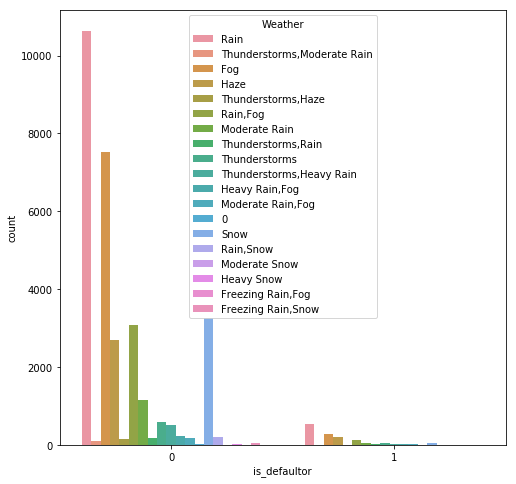

In [46]:
#plot and see the distribution of target variable
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.countplot(x='is_defaultor', hue='Weather', data=df2, ax=ax)
plt.show()


In [ ]:
#Looks like weather is not important

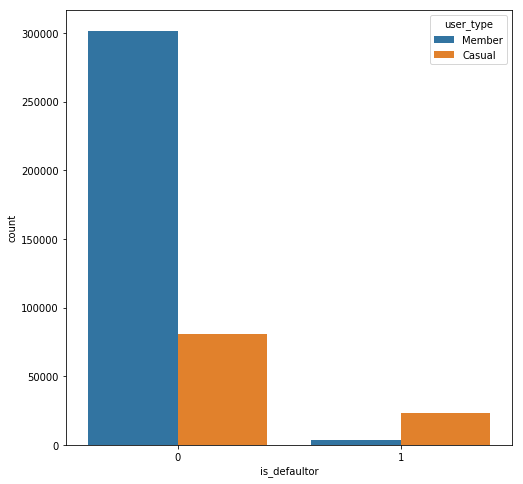

In [140]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.countplot(x='is_defaultor', hue='user_type', data=df2, ax=ax)
plt.show()

looks like casual travellers are doing more defaults than people who are members, weather not very essential

In [64]:
df2.describe()

,Month,Day,Hour,Start_Temp,Dew_Point,RH,WindSpeed,Visibility,Pressure,PopDensity,...,60000to69999_pct,70000to79999_pct,80000to89999_pct,90000to99999_pct,100000andover_pct,100000to124999_pct,125000to149999_pct,150000to199999_pct,day_of_week,is_defaultor
count,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,...,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000,409454.000000
mean,9.039098,15.390994,13.772204,17.658983,12.108822,71.150549,15.164145,15.590999,100.739998,2167.577957,...,0.079045,0.066801,0.053734,0.042766,0.213244,0.076771,0.047613,0.088817,2.826339,0.065167
std,1.491737,8.800743,7.078034,7.865932,7.597982,14.123204,8.981451,2.101122,2.212074,1058.910119,...,0.012683,0.011775,0.011456,0.010344,0.062083,0.018135,0.011664,0.041862,1.928218,0.246821
min,7.000000,1.000000,0.000000,-11.100000,-16.300000,0.000000,0.000000,0.000000,0.000000,565.000000,...,0.058311,0.051524,0.035088,0.024607,0.078010,0.038743,0.019372,0.018848,0.000000,0.000000
25%,8.000000,8.000000,10.000000,12.900000,7.300000,62.000000,9.000000,16.100000,100.360000,1315.000000,...,0.068249,0.056380,0.043103,0.032665,0.176724,0.062334,0.039456,0.064777,1.000000,0.000000
50%,9.000000,15.000000,15.000000,20.000000,14.000000,72.000000,13.000000,16.100000,100.800000,1695.000000,...,0.071950,0.060512,0.050195,0.040650,0.228084,0.071217,0.047478,0.084110,3.000000,0.000000
75%,10.000000,23.000000,20.000000,23.400000,18.000000,81.000000,21.000000,16.100000,101.240000,3650.000000,...,0.095758,0.081290,0.066822,0.055910,0.255395,0.097842,0.058975,0.098700,4.000000,0.000000
max,12.000000,31.000000,23.000000,34.500000,25.200000,99.000000,61.000000,16.100000,103.090000,4480.000000,...,0.096353,0.088368,0.074261,0.055910,0.445771,0.117689,0.087076,0.309453,6.000000,1.000000


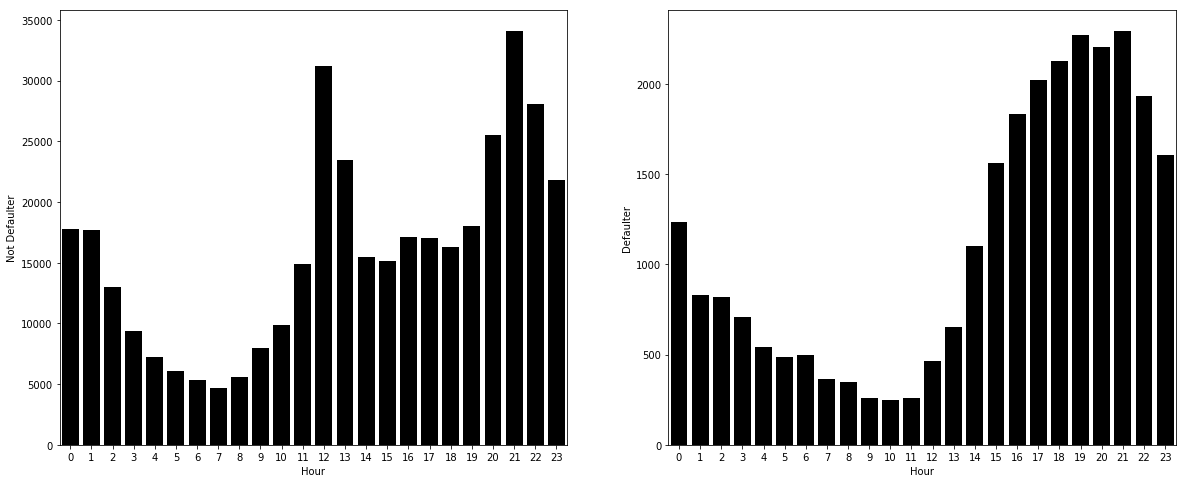

In [176]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
g1 = sns.countplot(x='Hour', data=df2[df2['is_defaultor'] ==0], color = 'k',ax=ax[0]) 
g1.set_ylabel('Not Defaulter')
g2 = sns.countplot(x='Hour', data=df2[df2['is_defaultor'] == 1], color = 'k',ax=ax[1]) 
g2.set_ylabel('Defaulter')
plt.show()

Looks like people starting after 2pm are more likely to ride for more than 30 min ie. defaultor

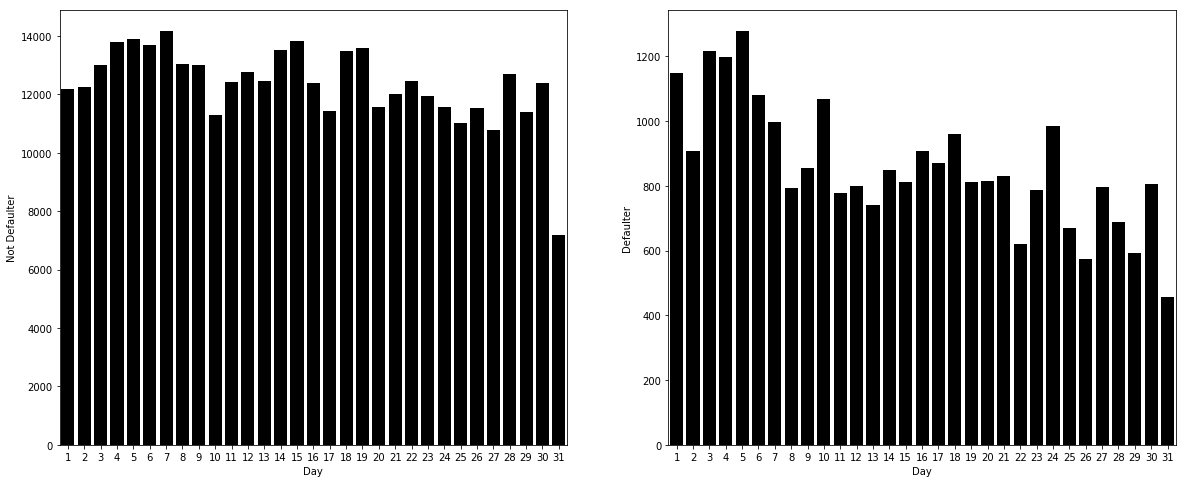

In [182]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
g1 = sns.countplot(x='Day', data=df2[df2['is_defaultor'] ==0], color = 'k',ax=ax[0]) 
g1.set_ylabel('Not Defaulter')
g2 = sns.countplot(x='Day', data=df2[df2['is_defaultor'] == 1], color = 'k',ax=ax[1]) 
g2.set_ylabel('Defaulter')
plt.show()

cant say anything. fairly distributed!

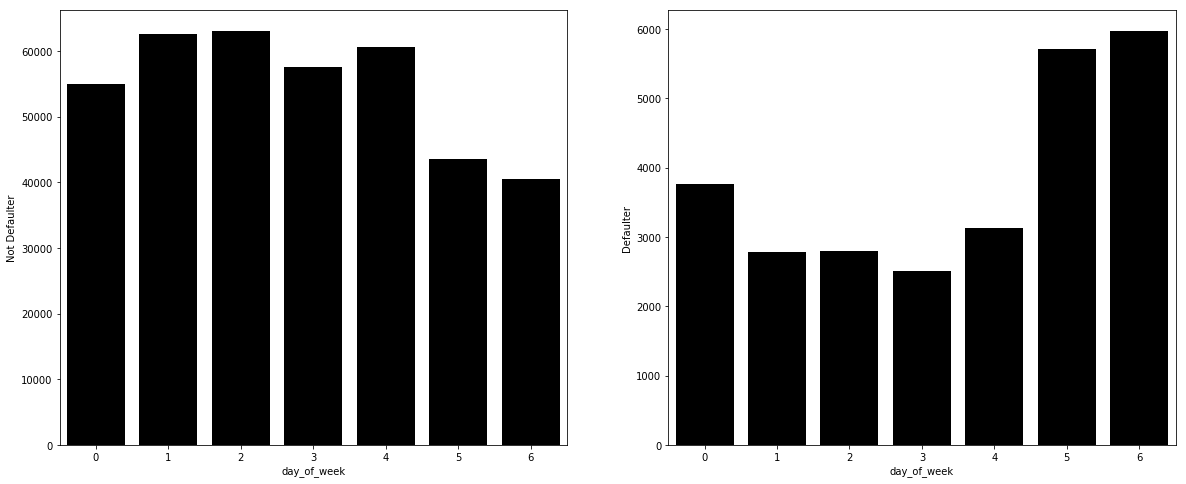

In [177]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
g1 = sns.countplot(x='day_of_week', data=df2[df2['is_defaultor'] ==0], color = 'k',ax=ax[0]) 
g1.set_ylabel('Not Defaulter')
g2 = sns.countplot(x='day_of_week', data=df2[df2['is_defaultor'] == 1], color = 'k',ax=ax[1]) 
g2.set_ylabel('Defaulter')
plt.show()

People are defaulting a lot during the weekend.

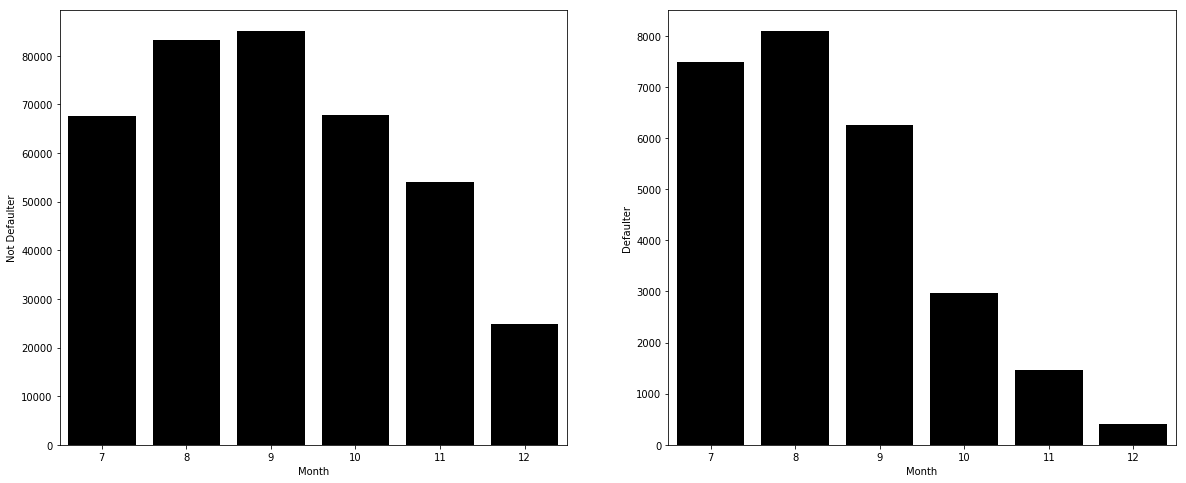

In [178]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
g1 = sns.countplot(x='Month', data=df2[df2['is_defaultor'] ==0], color = 'k',ax=ax[0]) 
g1.set_ylabel('Not Defaulter')
g2 = sns.countplot(x='Month', data=df2[df2['is_defaultor'] == 1], color = 'k',ax=ax[1]) 
g2.set_ylabel('Defaulter')
plt.show()

### Feature Importance

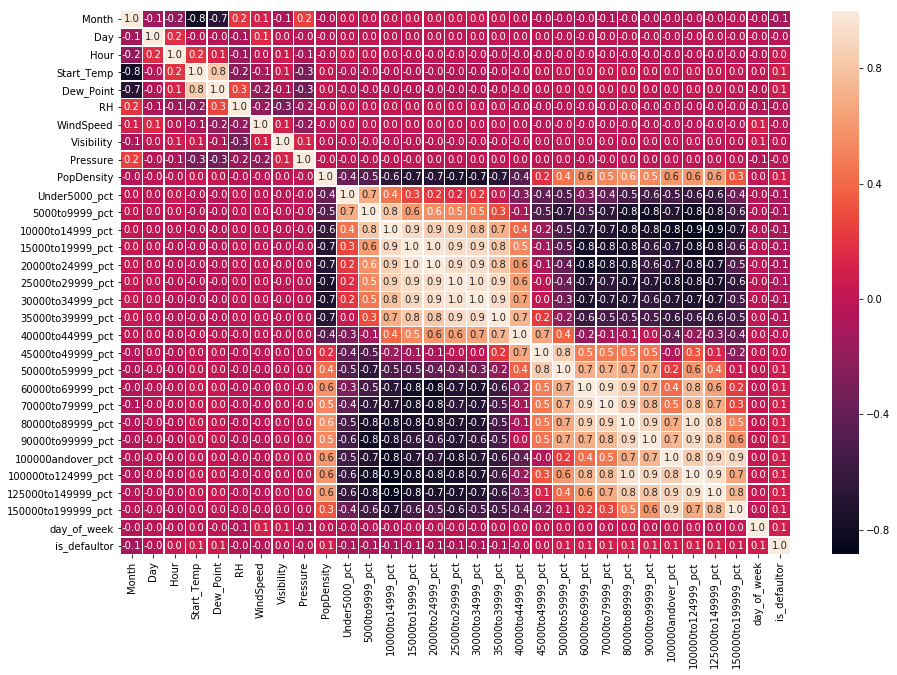

In [66]:
# Compute the correlation matrix  
corr_all = df2.corr(method= 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (15, 10))

# Draw the heatmap with the mask and correct aspect ratio  
sns.heatmap(corr_all, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Based on the above correlation chart, it is better to correlate all the income related into one as they are correlated.

In [97]:
df2['income_avg'] = 0
df2['income_avg'] = df2['income_avg'] + df2['Under5000_pct'].apply(lambda x: x*2500)
df2['income_avg'] = df2['income_avg'] + df2['5000to9999_pct'].apply(lambda x: x*7500)
df2['income_avg'] = df2['income_avg'] + df2['10000to14999_pct'].apply(lambda x: x*12500)
df2['income_avg'] = df2['income_avg'] + df2['15000to19999_pct'].apply(lambda x: x*17500)
df2['income_avg'] = df2['income_avg'] + df2['20000to24999_pct'].apply(lambda x: x*22500)
df2['income_avg'] = df2['income_avg'] + df2['25000to29999_pct'].apply(lambda x: x*27500)
df2['income_avg'] = df2['income_avg'] + df2['30000to34999_pct'].apply(lambda x: x*32500)
df2['income_avg'] = df2['income_avg'] + df2['35000to39999_pct'].apply(lambda x: x*37500)
df2['income_avg'] = df2['income_avg'] + df2['40000to44999_pct'].apply(lambda x: x*42500)
df2['income_avg'] = df2['income_avg'] + df2['45000to49999_pct'].apply(lambda x: x*47500)
df2['income_avg'] = df2['income_avg'] + df2['50000to59999_pct'].apply(lambda x: x*55000)
df2['income_avg'] = df2['income_avg'] + df2['60000to69999_pct'].apply(lambda x: x*65000)
df2['income_avg'] = df2['income_avg'] + df2['70000to79999_pct'].apply(lambda x: x*75000)
df2['income_avg'] = df2['income_avg'] + df2['80000to89999_pct'].apply(lambda x: x*85000) 
df2['income_avg'] = df2['income_avg'] + df2['100000to124999_pct'].apply(lambda x: x*112500)
df2['income_avg'] = df2['income_avg'] + df2['125000to149999_pct'].apply(lambda x: x*137500)
df2['income_avg'] = df2['income_avg'] + df2['150000to199999_pct'].apply(lambda x: x*175000)
df2_5 = df2.drop(['Under5000_pct',
       '5000to9999_pct', '10000to14999_pct', '15000to19999_pct',
       '20000to24999_pct', '25000to29999_pct', '30000to34999_pct',
       '35000to39999_pct', '40000to44999_pct', '45000to49999_pct',
       '50000to59999_pct', '60000to69999_pct', '70000to79999_pct',
       '80000to89999_pct', '90000to99999_pct', '100000andover_pct',
       '100000to124999_pct', '125000to149999_pct', '150000to199999_pct'], axis=1)

# remove Dew_Point & Month as they are highly correlated with temperature, popdensity correlated with income, weather
df2_5 = df2_5.drop(['Weather','Dew_Point', 'Month','PopDensity'], axis=1)

df2_5.head()

,Day,Hour,from_station_name,user_type,Start_Temp,RH,WindSpeed,Visibility,Pressure,day_of_week,is_defaultor,income_avg
0,1,0,Wellington St W / Bay St,Member,16.1,74,0,16.1,100.43,4,0,52553.879285
1,1,0,Bay St / Queens Quay W (Ferry Terminal),Casual,16.1,74,0,16.1,100.43,4,1,68708.006373
2,1,0,Edward St / Yonge St,Member,16.1,74,0,16.1,100.43,4,0,52553.879285
3,1,0,Simcoe St / Queen St W,Member,16.1,74,0,16.1,100.43,4,0,49723.495850
4,1,0,University Ave / Elm St,Member,16.1,74,0,16.1,100.43,4,0,49723.495850


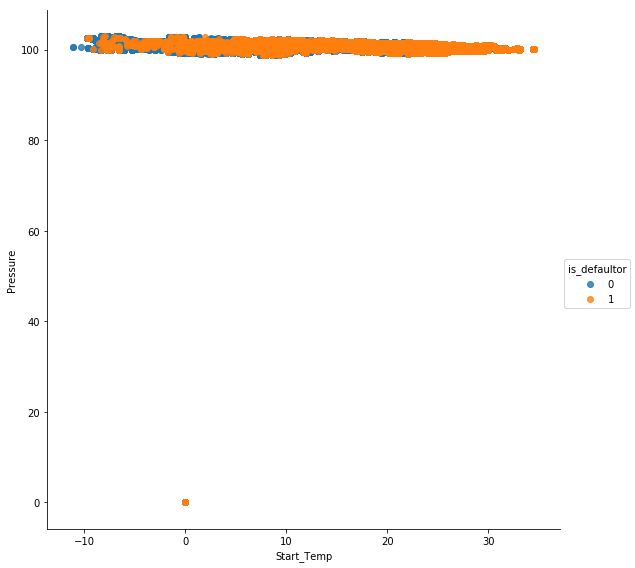

In [82]:
sns.lmplot( y="Pressure", x="Start_Temp", data=df2_5, fit_reg=False, hue='is_defaultor', size=8, aspect=1)
plt.show()

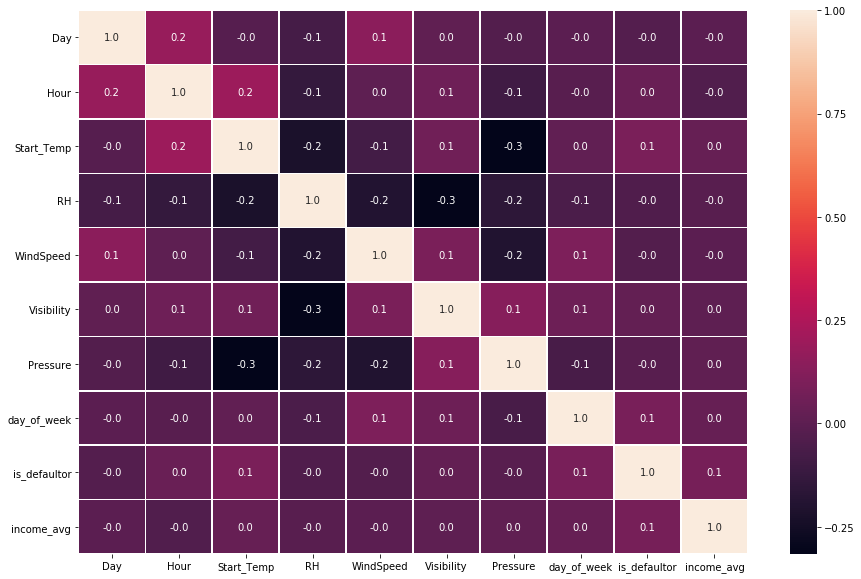

In [83]:
# Compute the correlation matrix  
corr_all = df2_5.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (15, 10))

# Draw the heatmap with the mask and correct aspect ratio  
sns.heatmap(corr_all, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

These features look good! :)

### Encode Categorical columns
Lets first try to visualize the number of unique values in each of the categorical variables.

#### How to Convert Categorical Data to Numerical Data?

This can be done by using one of the methods:

1. **Integer Encoding:** In this method, each unique category value is assigned an integer value.  For example, “red” is 1, “green” is 2, and “blue” is 3. This method is good when variables have ordered relationship between each other. For eq. Education has ordinal relationship as '12th' > 'Preschool'.

2. **One-Hot Encoding:** For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value. For example, in the “sex” variable, there are 2 categories and therefore 2 binary variables are needed. A “1” value is placed in the binary variable for the male and “0” values for the female.

#### Based on the above definition, we can perform the following operations. 

**One-Hot Encoding** on following column as they are ordinally independent.
1. user_type

**Label Encoding** on following column just to restrict the number of features.
1. from_station_name  

Source: 
1. https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
2. https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [187]:
cd = []
for c in df2_5.select_dtypes(include=['object']).columns:
    cd.append({
        'column': c,
        'values': len(df[c].unique())
    })

cd = pd.DataFrame(cd) 
cd.head()

,column,values
0,from_station_name,200
1,user_type,2


In [188]:
# perform on hot encoding
df3 = pd.get_dummies(df2_5, columns=['user_type'], drop_first=True) # drop_first=True as N-1 dimensions are required

# perform label encoding
from sklearn.preprocessing import LabelEncoder
df3["from_station_name"] = LabelEncoder().fit_transform(df3["from_station_name"])

# columns
print(df3.columns)

# debug
df3.head()

Index(['Day', 'Hour', 'from_station_name', 'Start_Temp', 'RH', 'WindSpeed',
       'Visibility', 'Pressure', 'day_of_week', 'is_defaultor', 'income_avg',
       'user_type_Member'],
      dtype='object')


,Day,Hour,from_station_name,Start_Temp,RH,WindSpeed,Visibility,Pressure,day_of_week,is_defaultor,income_avg,user_type_Member
0,1,0,188,16.1,74,0,16.1,100.43,4,0,52553.879285,1
1,1,0,16,16.1,74,0,16.1,100.43,4,1,68708.006373,0
2,1,0,72,16.1,74,0,16.1,100.43,4,0,52553.879285,1
3,1,0,164,16.1,74,0,16.1,100.43,4,0,49723.495850,1
4,1,0,182,16.1,74,0,16.1,100.43,4,0,49723.495850,1


### Feature Scaling

In [189]:
columns = ['Start_Temp', 'RH', 'WindSpeed', 'Visibility', 'Pressure','income_avg']
scaler = preprocessing.StandardScaler()
print('\nbefore scaling \n')

print(df3[columns].head()) 
df3[columns] = scaler.fit_transform(df3[columns])
print('\nafter scaling \n')
print(df3[columns].head())


before scaling 

   Start_Temp  RH  WindSpeed  Visibility  Pressure    income_avg
0        16.1  74          0        16.1    100.43  52553.879285
1        16.1  74          0        16.1    100.43  68708.006373
2        16.1  74          0        16.1    100.43  52553.879285
3        16.1  74          0        16.1    100.43  49723.495850
4        16.1  74          0        16.1    100.43  49723.495850

after scaling 

   Start_Temp        RH  WindSpeed  Visibility  Pressure  income_avg
0   -0.198195  0.201757  -1.688387    0.242252 -0.140139   -0.872148
1   -0.198195  0.201757  -1.688387    0.242252 -0.140139    0.805781
2   -0.198195  0.201757  -1.688387    0.242252 -0.140139   -0.872148
3   -0.198195  0.201757  -1.688387    0.242252 -0.140139   -1.166140
4   -0.198195  0.201757  -1.688387    0.242252 -0.140139   -1.166140


In [101]:
df3.head()

,Day,Hour,from_station_name,Start_Temp,RH,WindSpeed,Visibility,Pressure,day_of_week,is_defaultor,income_avg,user_type_Member
0,1,0,188,-0.198195,0.201757,-1.688387,0.242252,-0.140139,4,0,-0.872148,1
1,1,0,16,-0.198195,0.201757,-1.688387,0.242252,-0.140139,4,1,0.805781,0
2,1,0,72,-0.198195,0.201757,-1.688387,0.242252,-0.140139,4,0,-0.872148,1
3,1,0,164,-0.198195,0.201757,-1.688387,0.242252,-0.140139,4,0,-1.166140,1
4,1,0,182,-0.198195,0.201757,-1.688387,0.242252,-0.140139,4,0,-1.166140,1


### Data Modelling

In [190]:
# Then we will split the data into features (X) and label (y).
X = df3.drop('is_defaultor',axis=1)
y = df3['is_defaultor']

In [281]:
# define 5 different models
rfc = RandomForestClassifier()
lr = LogisticRegression() 
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
mlp = MLPClassifier()

# data limiter @TODO
LIMIT = 0.9

In [282]:
def modelPredict(model, fold, X_train, y_train, X_test, y_test, algo, res):
    
    # fit
    model.fit(X_train, y_train) 
    
    # accuracy 
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    #confusion
    cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
    
    # store/append
    res.append({
        'algo': algo,
        'fold': fold,
        'type': 'train',
        'accuracy': accuracy_score(y_train, model.predict(X_train)),
        #'cnf_matrix': confusion_matrix(y_train, model.predict(X_train)).ravel()
        'tn': confusion_matrix(y_train, model.predict(X_train)).ravel()[0],
        'fp': confusion_matrix(y_train, model.predict(X_train)).ravel()[1],
        'fn': confusion_matrix(y_train, model.predict(X_train)).ravel()[2],
        'tp': confusion_matrix(y_train, model.predict(X_train)).ravel()[3]
    })
    res.append({
        'algo': algo,
        'fold': fold,
        'type': 'test',
        'accuracy': accuracy_score(y_test, model.predict(X_test)),
        #'cnf_matrix': confusion_matrix(y_test, model.predict(X_test)).ravel()[1]
        'tn': confusion_matrix(y_test, model.predict(X_test)).ravel()[0],
        'fp': confusion_matrix(y_test, model.predict(X_test)).ravel()[1],
        'fn': confusion_matrix(y_test, model.predict(X_test)).ravel()[2],
        'tp': confusion_matrix(y_test, model.predict(X_test)).ravel()[3]
    })
    
    # return
    return res


#run KFold with 10 folds instead of the default 3
kf = KFold(int(len(X)*LIMIT), n_folds=10)
res = []
fold = 0

for train_index, test_index in kf:
    
    # fold index
    fold += 1
    
    # data
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    #model 1:  
    res = modelPredict(rfc, fold, X_train, y_train, X_test, y_test, 'Random Forest', res)
    
    #model 2: 
    res = modelPredict(lr, fold, X_train, y_train, X_test, y_test, 'Logistic Regression', res)
    
    #model 3:
    res = modelPredict(gbc, fold, X_train, y_train, X_test, y_test, 'Gradient Boosting', res)
    
    #model 4: 
    res = modelPredict(knn, fold, X_train, y_train, X_test, y_test, 'K Nearest Neighbor', res) 
        
    #model 5: 
    res = modelPredict(mlp, fold, X_train, y_train, X_test, y_test, 'Multi-Layer Perceptron', res) 
    

In [280]:
res = pd.DataFrame(res)
#c_m = res.cnf_matrix[1]
#c_m
res.info

<bound method DataFrame.info of     accuracy                    algo   fn  fold   fp    tn   tp   type
0   0.930239           Random Forest  158     1   99  2883  544  train
1   0.875610           Random Forest   37     1   14   353    6   test
2   0.808632     Logistic Regression  698     1    7  2975    4  train
3   0.887805     Logistic Regression   43     1    3   364    0   test
4   0.837676       Gradient Boosting  578     1   20  2962  124  train
5   0.887805       Gradient Boosting   38     1    8   359    5   test
6   0.855320      K Nearest Neighbor  412     1  121  2861  290  train
7   0.804878      K Nearest Neighbor   43     1   37   330    0   test
8   0.815418  Multi-Layer Perceptron  646     1   34  2948   56  train
9   0.887805  Multi-Layer Perceptron   38     1    8   359    5   test
10  0.934039           Random Forest  136     2  107  2899  542  train
11  0.802439           Random Forest   51     2   30   313   16   test
12  0.815147     Logistic Regression  673    

In [283]:
res = pd.DataFrame(res)
r = pd.pivot_table(res,index=["algo", "type"],values=["accuracy","tn","fp","fn","tp"],aggfunc=[np.mean]).reset_index()
r.columns = ['algorithm', 'type', 'Mean Acuracy', 'Mean tn','Mean fp','Mean fn','Mean tp']
r

,algorithm,type,Mean Acuracy,Mean tn,Mean fp,Mean fn,Mean tp
0,Gradient Boosting,test,0.929348,2601.2,2.4,34242.7,4.5
1,Gradient Boosting,train,0.929409,23392.1,20.0,308185.9,59.2
2,K Nearest Neighbor,test,0.916366,2385.7,696.3,33548.8,220.0
3,K Nearest Neighbor,train,0.941614,15936.7,3427.6,304778.3,7514.6
4,Logistic Regression,test,0.929291,2605.7,0.0,34245.1,0.0
5,Logistic Regression,train,0.929293,23449.7,0.9,308205.0,1.6
6,Multi-Layer Perceptron,test,0.929234,2601.6,6.2,34238.9,4.1
7,Multi-Layer Perceptron,train,0.929291,23376.4,74.6,308131.3,74.9
8,Random Forest,test,0.925204,2462.4,293.9,33951.2,143.3
9,Random Forest,train,0.974246,5793.4,2748.2,305457.7,17657.9


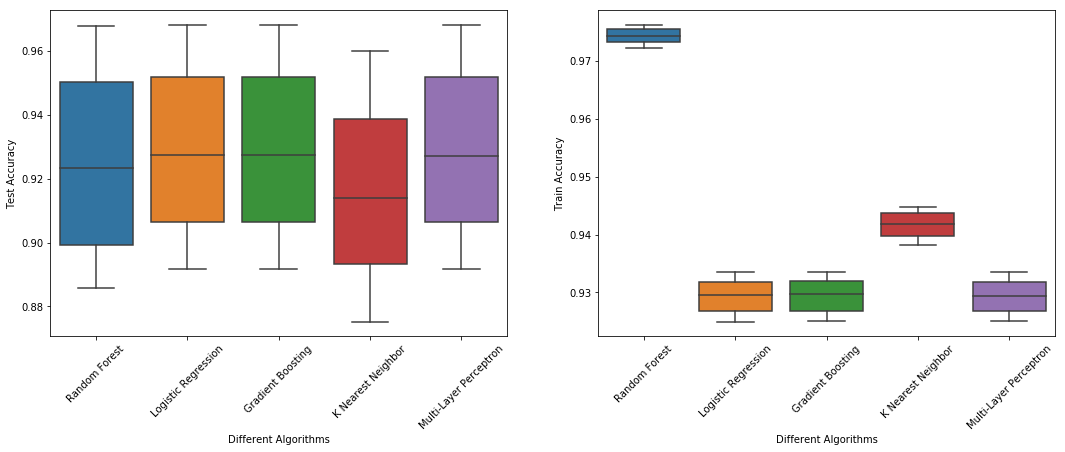

In [284]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))
g2 = sns.boxplot(x="algo", y="accuracy", data=res[res['type'] == 'test'], ax=ax[0])
g2.set_xlabel('Different Algorithms')
g2.set_ylabel('Test Accuracy')
g1 = sns.boxplot(x="algo", y="accuracy", data=res[res['type'] == 'train'], ax=ax[1])
plt.setp(g1.get_xticklabels(), rotation=45)
plt.setp(g2.get_xticklabels(), rotation=45)
g1.set_xlabel('Different Algorithms')
g1.set_ylabel('Train Accuracy')
plt.show()

#### Discussion:
1. Random Forest is overfitting as Train Accuracy > Test Accuracy.
2. Gradient Boosting & KNN looks like having underfitting as Train Accuracy  < Test Accuracy

#### Hyper parameter Tuning

In [285]:
def modelPredictGridSearchCV(model, X_train, y_train, X_test, y_test, algo, parameter):
    
    # Use classification accuracy to compare parameter combinations
    acc_scorer_model = make_scorer(accuracy_score)

    # Run a grid search for the Logistic Regression classifier and all the selected parameters
    grid_obj_model = GridSearchCV(model, parameter, scoring=acc_scorer_model, cv = 5)
    grid_obj_model = grid_obj_model.fit(X_train, y_train)

    # Set our classifier, lg, to have the best combination of parameters
    model = grid_obj_model.best_estimator_

    # fit
    model.fit(X_train, y_train) 
    
    # return
    return {
        'algo': algo,
        'trainAccuracy': accuracy_score(y_train, model.predict(X_train)),
        'testAccuracy': accuracy_score(y_test, model.predict(X_test)),
        'bestParam': grid_obj_model.best_params_
    }

# results var
results = []

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3*LIMIT, train_size=0.7*LIMIT, random_state=42, stratify=y)

#model 1:
params = {'n_estimators': [200, 300, 400, 500]}
results.append(modelPredictGridSearchCV(rfc, X_train, y_train, X_test, y_test, 'Random Forest', params))

#model 2: 
params = {'C':[0.2, 0.4, 0.5, 0.6, 0.8, 1]}
results.append(modelPredictGridSearchCV(lr, X_train, y_train, X_test, y_test, 'Logistic Regression', params))

#model 3: 
params = {'n_neighbors': [3, 5, 8, 10]}
results.append(modelPredictGridSearchCV(knn, X_train, y_train, X_test, y_test, 'K Nearest Neighbor', params))

#model 4: 
params = {'max_depth': [3, 5, 8, 10]}
results.append(modelPredictGridSearchCV(gbc, X_train, y_train, X_test, y_test, 'Gradient Boosting', params))

#model 5: 
#params = {'hidden_layer_sizes': [10, 50, 100, 500]}
params = {'activation': ['identity', 'logistic', 'tanh','relu']}
results.append(modelPredictGridSearchCV(mlp, X_train, y_train, X_test, y_test, 'Multi-Layer Perceptron', params))


In [286]:
results = pd.DataFrame(results)
results

,algo,bestParam,testAccuracy,trainAccuracy
0,Random Forest,{'n_estimators': 500},0.937632,0.983800
1,Logistic Regression,{'C': 0.2},0.934837,0.934834
2,K Nearest Neighbor,{'n_neighbors': 10},0.934122,0.937179
3,Gradient Boosting,{'max_depth': 10},0.936040,0.952244
4,Multi-Layer Perceptron,{'activation': 'logistic'},0.934810,0.934834


In [288]:
results.info



<bound method DataFrame.info of                      algo                   bestParam  testAccuracy  \
0           Random Forest       {'n_estimators': 500}      0.937632   
1     Logistic Regression                  {'C': 0.2}      0.934837   
2      K Nearest Neighbor         {'n_neighbors': 10}      0.934122   
3       Gradient Boosting           {'max_depth': 10}      0.936040   
4  Multi-Layer Perceptron  {'activation': 'logistic'}      0.934810   

   trainAccuracy  
0       0.983800  
1       0.934834  
2       0.937179  
3       0.952244  
4       0.934834  >

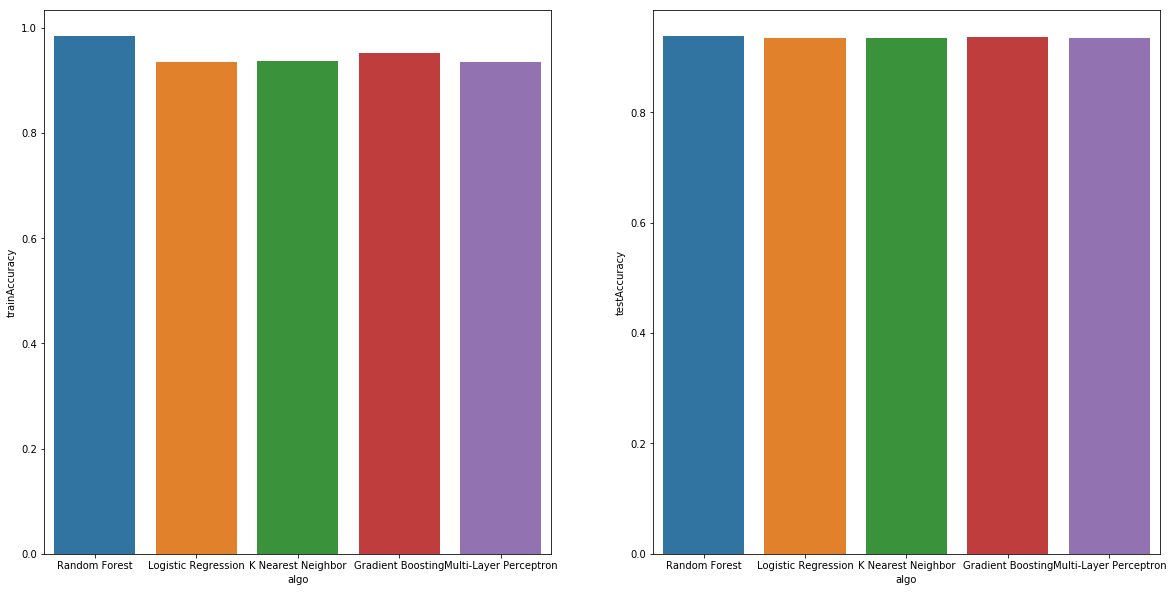

In [287]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
sns.barplot(x="algo", y="trainAccuracy", data=results, ax=ax1)
sns.barplot(x="algo", y="testAccuracy", data=results, ax=ax2)
plt.show()

model should have similar accuracy for both train and test data. We will choose the one with best accuracy in the end!.